# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [84]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier



import warnings
warnings.filterwarnings("ignore")


## Import Dataset

- Observations
- Sanity checks

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
data = pd.read_csv("/content/drive/MyDrive/GreatLearning/EasyVisa.csv")

## Overview of Dataset

In [87]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [88]:
data.shape

(25480, 12)

Data have 25480 rows & 12 cols

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In dataset the daya type we have are float64, int64, object

In [90]:
#null check

data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

No NULL/MISSING values.

Converting object data to categorical data

In [91]:
cols = data.select_dtypes(['object'])
cols.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [92]:
for i in cols.columns:
  data[i] = data[i].astype('category')

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


Object data type has been converted to category.

In [94]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


1. we have total of 25480 employees
2. comapny establised from 1800 to 2016
3. average wage is 74455
4. Point to be noted, in no_of_employees coulumn, the mean is 5667 while median is 2109. this says the data is right skwed
5. also, in prevailing_wage, the mean is 74455 & median is 70308, it says the col is slight righted skewed


In [95]:
data.describe(include=['category']).transpose()

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


1. as observed we have a total of 6 different continent & amoung that ASIA is on the top
2. Let's talk about education, labour  have 4 different eduaction & amoung that bachelor is on the top
3. majority of labour dont required training
4. we can drop case_id as it add no values in prediction
5. mostly full time workers are there
6. as per data set we have ~66% (17018 / 25480 * 100) certifird case_status & remaing non certified


In [96]:
data.drop(['case_id'], axis = 1, inplace=True)

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 797.7 KB


dropped case_id. we have now total 11 columns

In [98]:
# duplicates check

data[data.duplicated()].count()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

No duplicates

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

UNIVARIATE ANALYSIS

In [99]:
def hist_box(data, feature, figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )




# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()



In [100]:
data[(data["no_of_employees"]<=0)].count

<bound method DataFrame.count of            continent education_of_employee has_job_experience  \
245           Europe              Master's                  N   
378             Asia            Bachelor's                  N   
832    South America              Master's                  Y   
2918            Asia              Master's                  Y   
6439            Asia            Bachelor's                  N   
6634            Asia            Bachelor's                  Y   
7224          Europe             Doctorate                  N   
7281            Asia           High School                  N   
7318            Asia            Bachelor's                  Y   
7761            Asia              Master's                  N   
9872          Europe              Master's                  Y   
11493           Asia           High School                  Y   
13471  North America              Master's                  N   
14022           Asia            Bachelor's               

as we can see, the no_of_employees have -ve values, hence we need to drop them

In [101]:
#check data shape

data.shape

(25480, 11)

In [102]:
data.drop(data[(data['no_of_employees'] <= 0 )].index, inplace = True)

In [103]:
data.shape

(25447, 11)

**we removed a total of 25480 - 25447 = 33; hence we deletd 33 entries having -ve no of employees value**

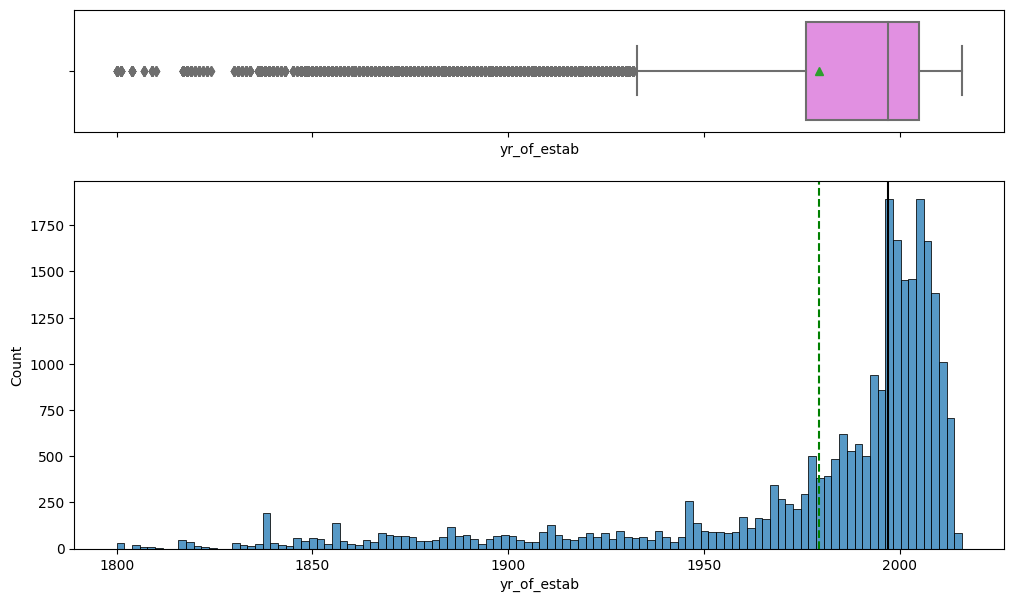

In [104]:
#observation on years of establishiment

hist_box(data, "yr_of_estab")

The year of estab is highly skwed left

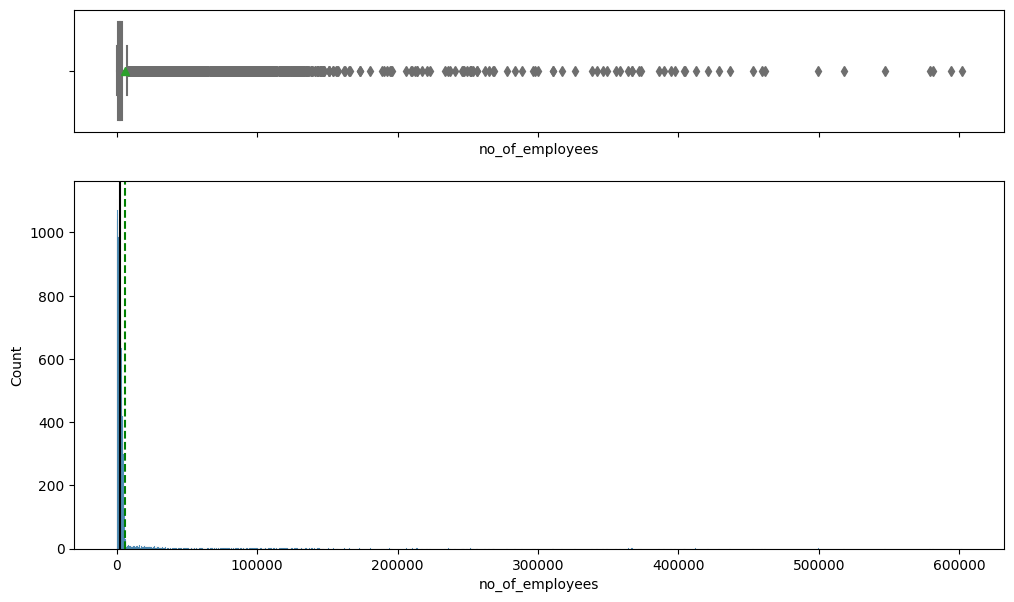

In [105]:
hist_box(data, "no_of_employees")

as it can be seen, number of emp is heavely skewed right, have to handle this

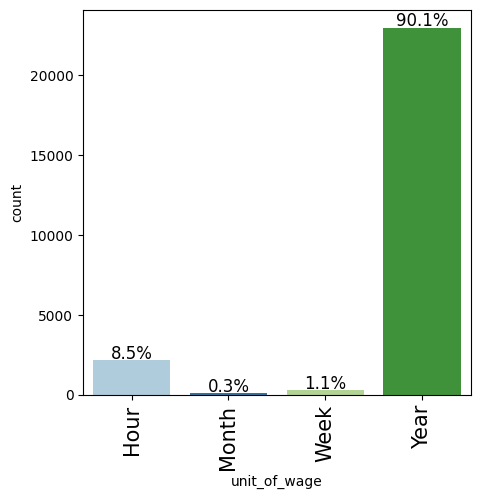

In [106]:
labeled_barplot(data, "unit_of_wage", perc = True)

as it can be seen, maximun number of unit_of_wage is under yearly, followed by Hour & then week

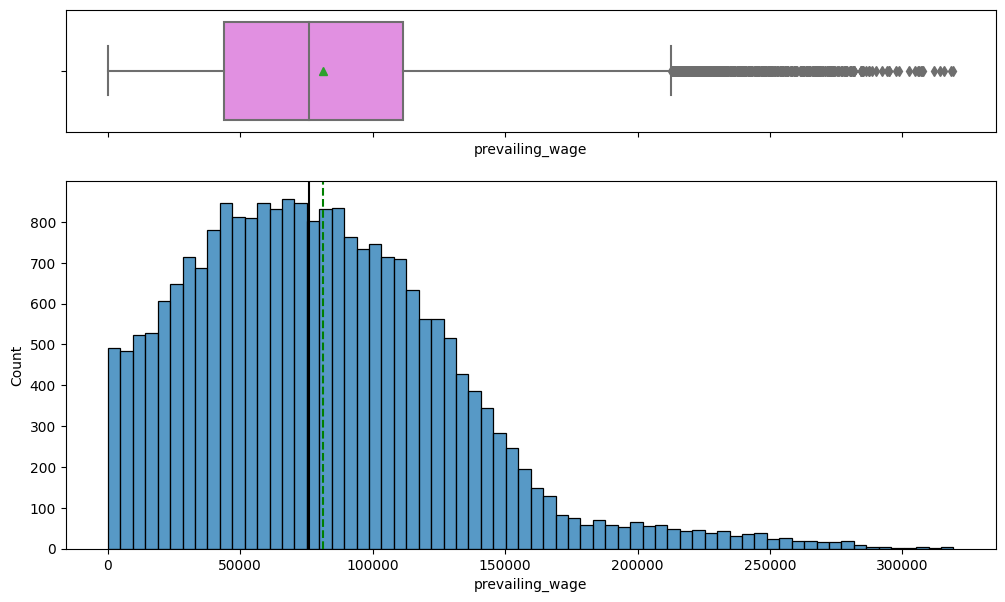

In [107]:
#relation b/w prevailing_wage & yearly
hist_box(data[data["unit_of_wage"] == "Year"], "prevailing_wage")

* as we can see, there are few outliners in a range from 220000 USD to 300000 USD
* MEAN & MEDIAN seems right


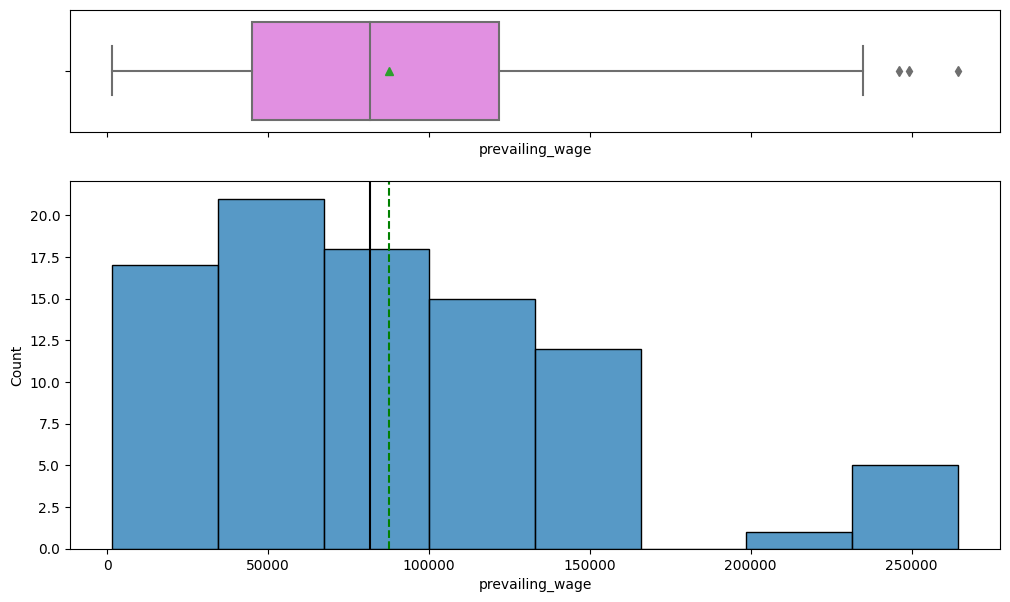

In [108]:
#relation b/w prevailing_wage & monthly
hist_box(data[data["unit_of_wage"] == "Month"], "prevailing_wage")

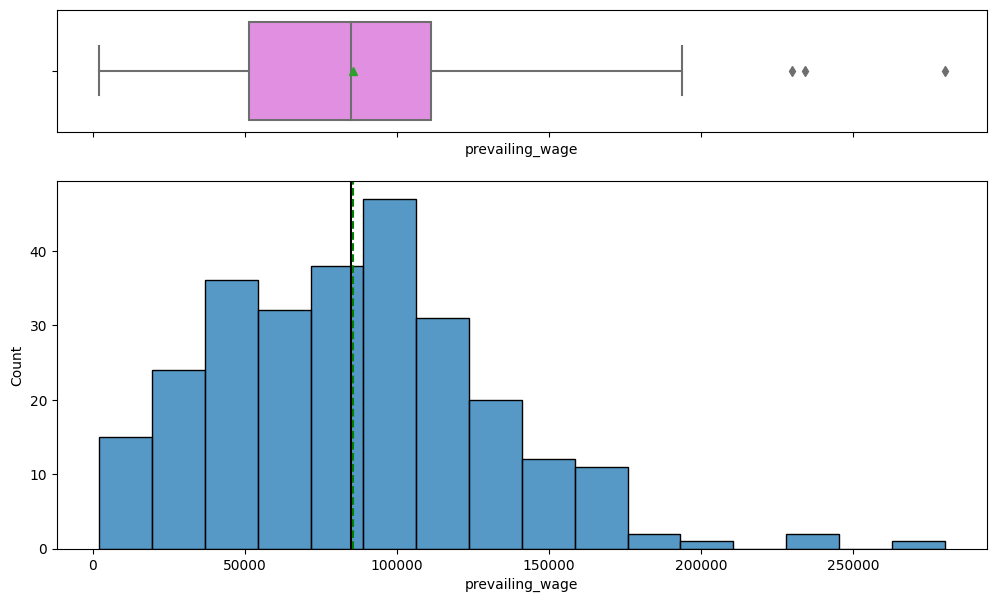

In [109]:
#relation b/w prevailing_wage & weekly
hist_box(data[data["unit_of_wage"] == "Week"], "prevailing_wage")

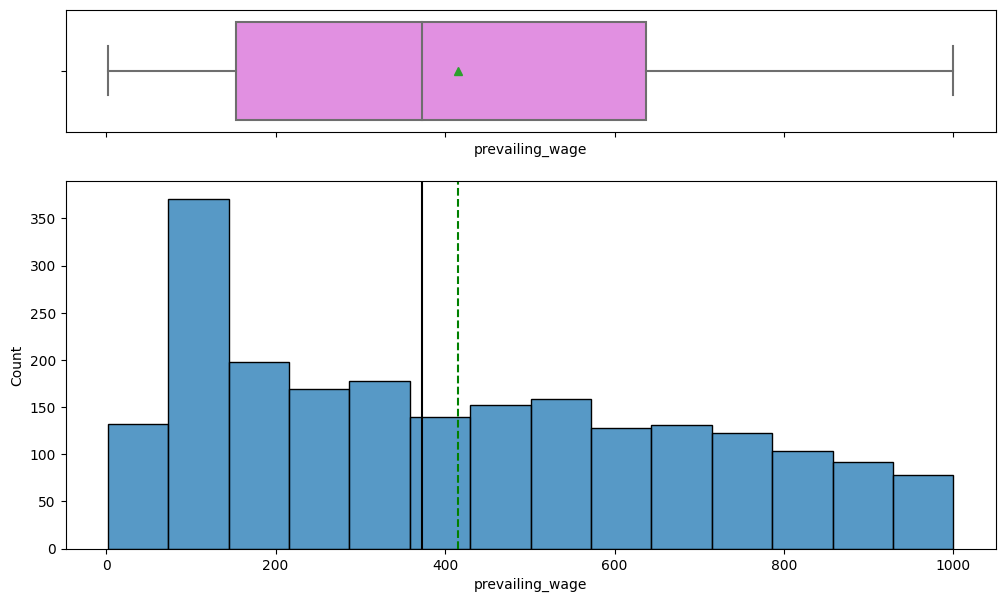

In [110]:
#relation b/w prevailing_wage & hourlyly
hist_box(data[data["unit_of_wage"] == "Hour"], "prevailing_wage")

as per this last chart, the hourely wage of labour is 400 USD, this could be assumed & as 90% of salary is yearloy, we will be using that for model building

# also, the data is in very clumsy state, hence we will be clubbing the data in to 2 category HOURELY & not HOURELY



In [111]:
data.loc[data["unit_of_wage"] == "Hour", "prevailing_wage"] = data.loc[data["unit_of_wage"] == "Hour", "prevailing_wage"] * 52

In [112]:
data["unit_of_wage"] = data["unit_of_wage"].astype('object')

data.loc[data["unit_of_wage"] == "Hour", "unit_of_wage"] = "Hourely"
data.loc[data["unit_of_wage"] == "Week", "unit_of_wage"] = "Not_Hourely"
data.loc[data["unit_of_wage"] == "Month", "unit_of_wage"] = "Not_Hourely"
data.loc[data["unit_of_wage"] == "Year", "unit_of_wage"] = "Not_Hourely"

data["unit_of_wage"] = data["unit_of_wage"].astype('category')

clubbed in to 2 category

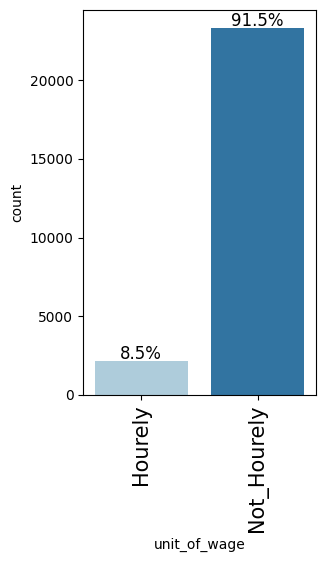

In [113]:
labeled_barplot(data, "unit_of_wage", perc = True)

We have 91.5% Not_Hourely wages & 8.5% of Hourely labor wage

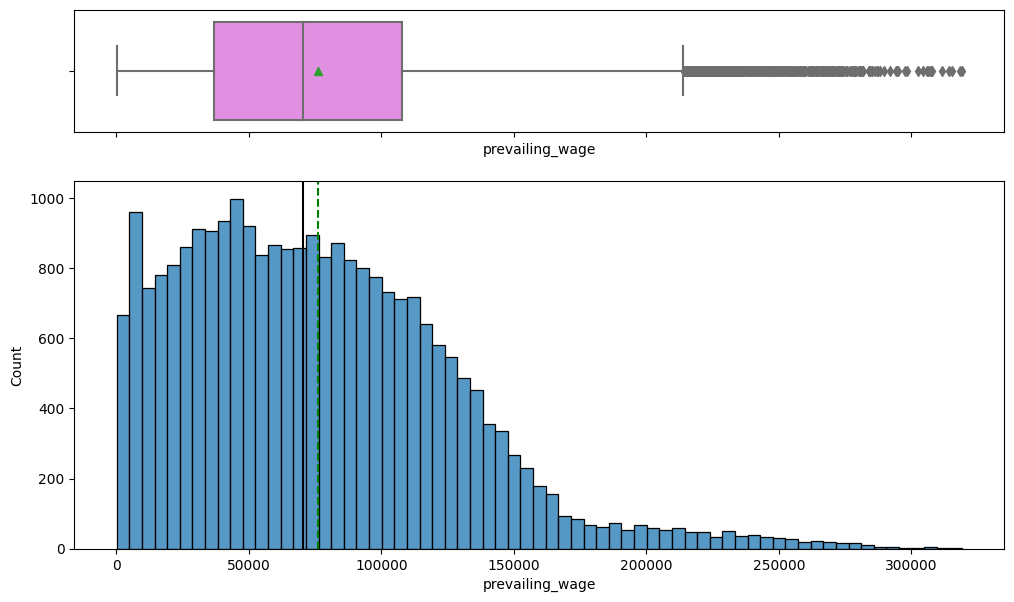

In [114]:
hist_box(data, "prevailing_wage")

still we have a lot of outliners,

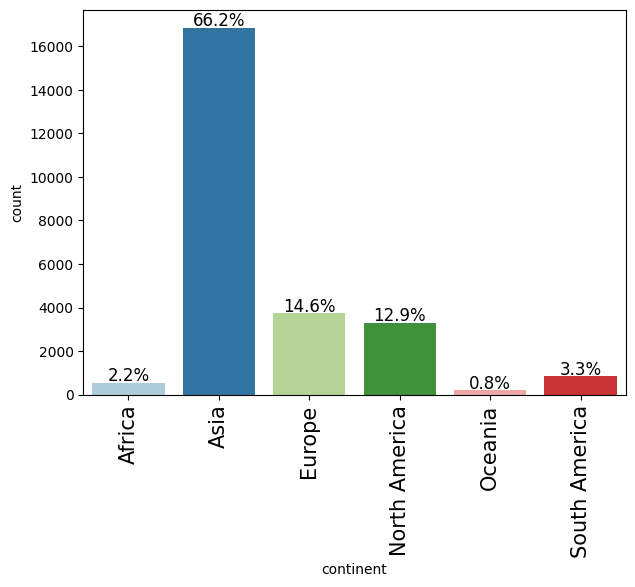

In [115]:
#let's check continent

labeled_barplot(data, "continent", perc = True)

mostly worker are from ASIA i.e 66.2%

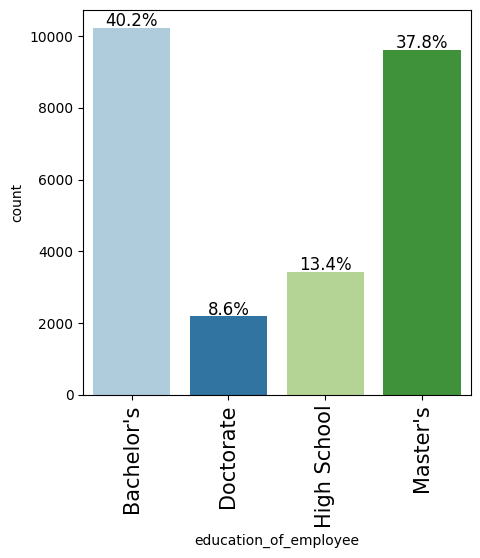

In [116]:
# lets look into education


labeled_barplot(data, "education_of_employee", perc = True)

40.2% of worker are BACHELORS followed by 37.8% of MASTERS

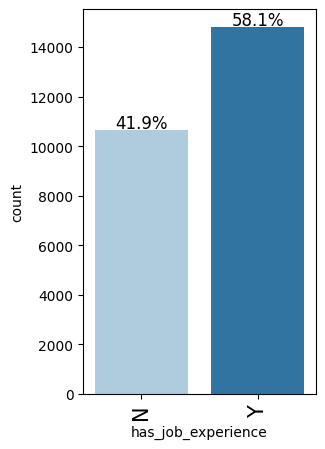

In [117]:
# lets look into experience


labeled_barplot(data, "has_job_experience", perc = True)

58.1% of worker has prior work experience while 41.9% of woerker dont have a prior work experince

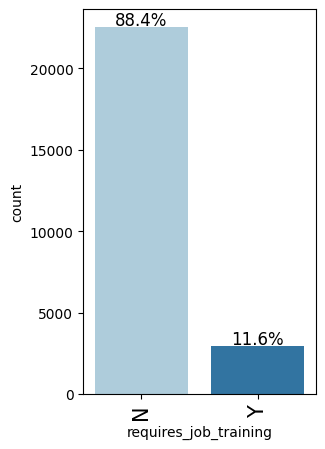

In [118]:
# lets look into training requirement


labeled_barplot(data, "requires_job_training", perc = True)

majority of worker dont requiretraining to work while just a bit of 11.6% of worker need training to work

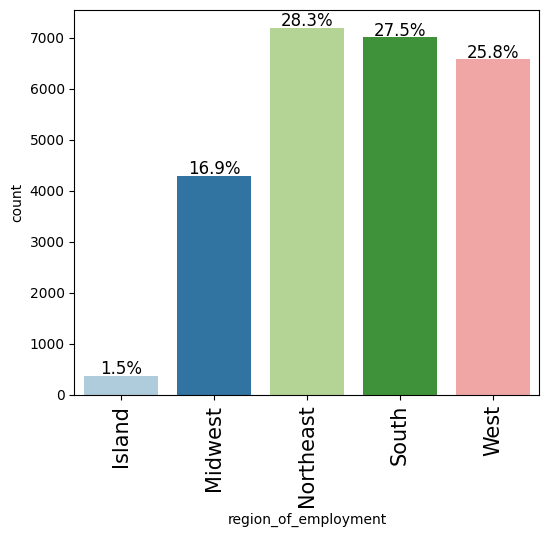

In [119]:
# lets look into regison of employment


labeled_barplot(data, "region_of_employment", perc = True)

Maroring of employement region are SOUTH, WEST, NorthEast. a few of them require emploement in other 2 i.e. Island & MidWest


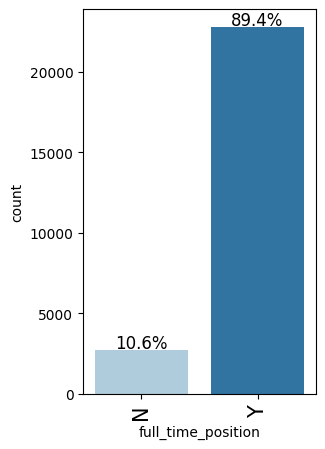

In [120]:
# lets look into full time position


labeled_barplot(data, "full_time_position", perc = True)

majority job is  full time job

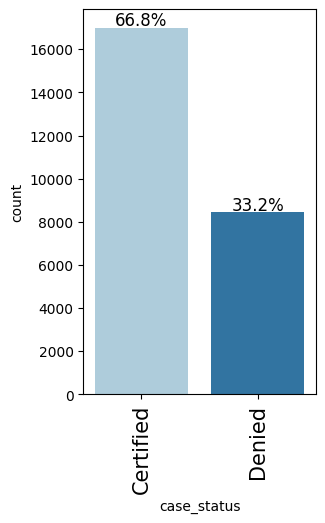

In [121]:
# lets look into current visa status


labeled_barplot(data, "case_status", perc = True)

66.8% of visa is approved. while 33.2 visa has been rejected.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

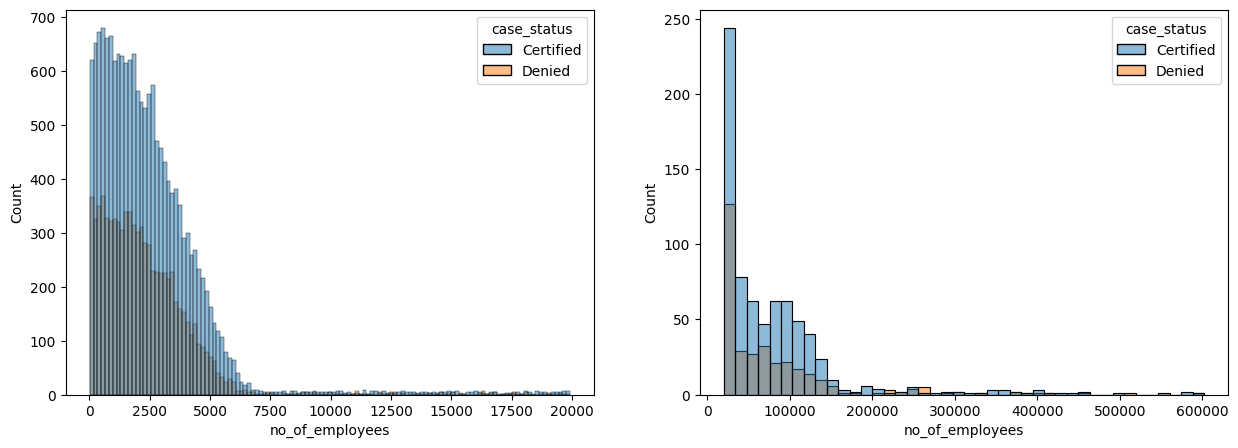

In [122]:
# lets do bivariate analysis

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data= data[data["no_of_employees"] < 20000] , x = "no_of_employees", hue = "case_status", ax = ax[0]);
sns.histplot(data= data[data["no_of_employees"] > 20000] , x = "no_of_employees", hue = "case_status", ax = ax[1]);

as it can be seen, more number of cases are cewrified when compared to denial for both no matter we have less or more workers

colclusion,no relation in number of employees & case_status

alos, we can see there are a lot of outliners, hence for that we will be spliting the number of employee into 3 category, i.e. Small, medium, large   

In [123]:
data["no_of_employees"] = pd.cut(data["no_of_employees"], [0,2500,7500,np.inf], labels = ["Small(2500-)", "Medium(2500-7500)", "Large(7500+)"])
data["no_of_employees"] = data["no_of_employees"].astype("category")

In [124]:
# function to plot stack barchart

def stacked_barplot(data, feature, target):
    count = data[feature].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[feature], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[feature], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind = "bar", stacked=True, figsize = (count + 5 , 5))
    plt.legend(
        loc = "lower left", frameon = False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

case_status        Certified  Denied    All
no_of_employees                            
All                    17001    8446  25447
Small(2500-)            9674    5084  14758
Medium(2500-7500)       6272    2874   9146
Large(7500+)            1055     488   1543
------------------------------------------------------------------------------------------------------------------------


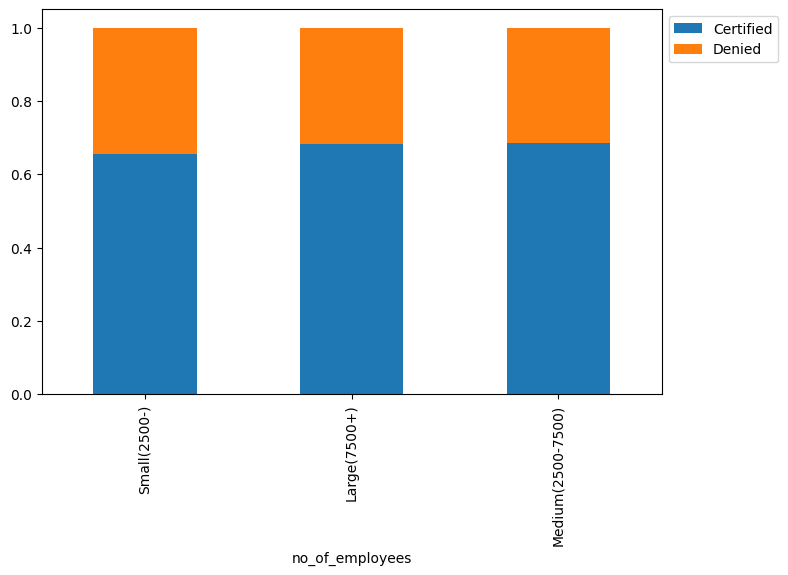

In [125]:
#relation between no of employees & case_status

stacked_barplot(data, "no_of_employees", "case_status")

we can see, majority of employees are from small sized companies, followed by medium & large

<Axes: xlabel='yr_of_estab', ylabel='Count'>

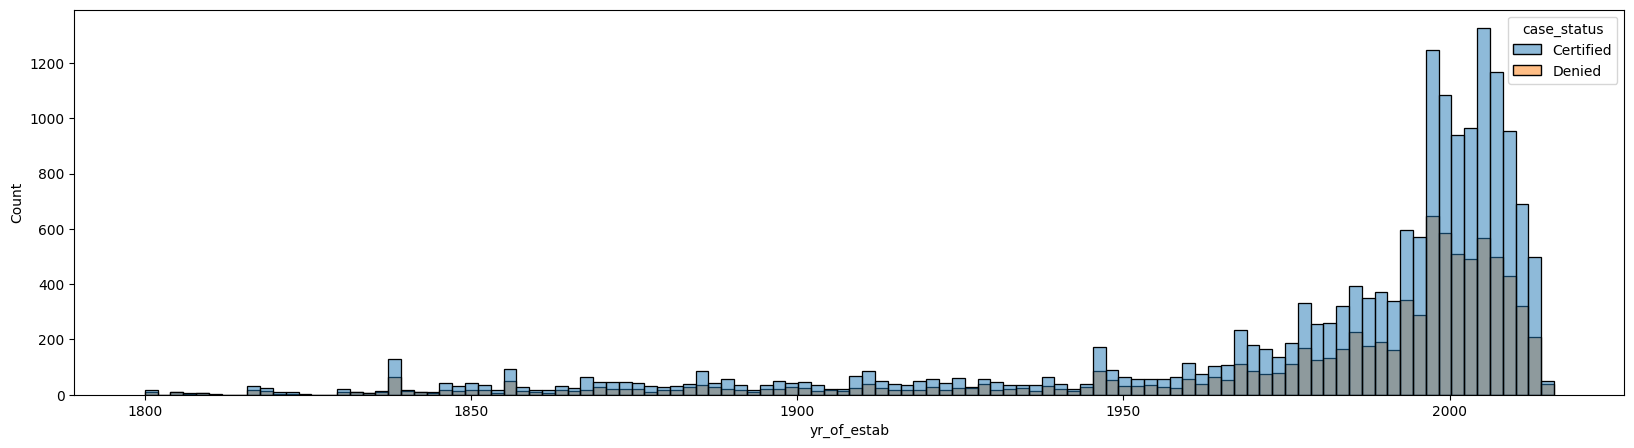

In [126]:
# relation between eastablishement year & case_status

plt.figure( figsize = (20, 5))
sns.histplot(data, x = "yr_of_estab", hue = "case_status")

1. similar to earlier obesrvations, here also we have ~50% of Cerified:Denied status.

2. also, we have ahgain a huge outliner, that we goona club here

In [127]:
data["yr_of_estab"] = pd.cut(data["yr_of_estab"], [-np.inf, 1900, np.inf], labels = ["Older_estab(1800-1900)", "Newer_estab(1900+)"])
data["yr_of_estab"] = data["yr_of_estab"].astype("category")

case_status             Certified  Denied    All
yr_of_estab                                     
All                         17001    8446  25447
Newer_estab(1900+)          15574    7726  23300
Older_estab(1800-1900)       1427     720   2147
------------------------------------------------------------------------------------------------------------------------


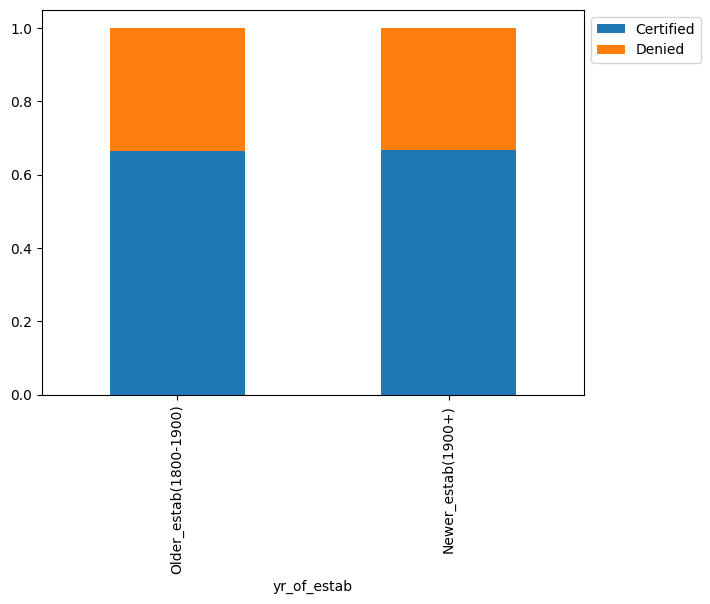

In [128]:
stacked_barplot(data, "yr_of_estab", "case_status")

* Almost 65% of case have been approved.
* as now data has been clubbed into 2 category, it seems much better, & we have a mojority of companies established after year 1900

case_status   Certified  Denied    All
unit_of_wage                          
All               17001    8446  25447
Not_Hourely       16254    7040  23294
Hourely             747    1406   2153
------------------------------------------------------------------------------------------------------------------------


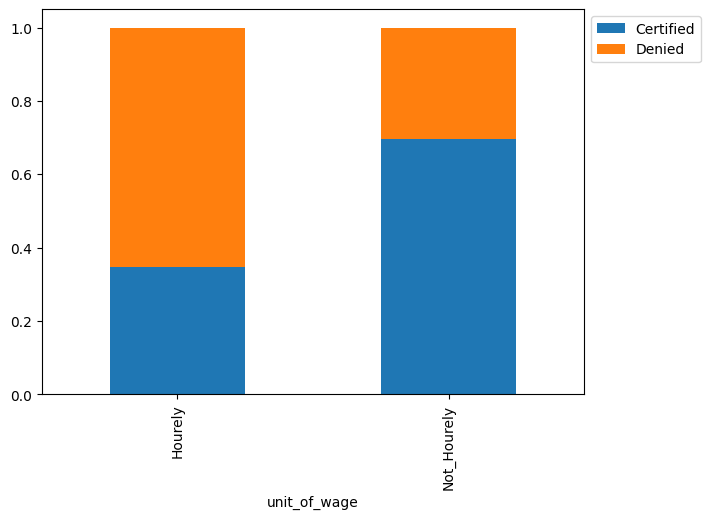

In [129]:
# let's analyse wage unit with case status

stacked_barplot(data, "unit_of_wage", "case_status")

* Majority of **Hourely** & Minorities of **Not_Hourely** wages have been DENIED
* Majority of **Not_Hourely** & Minorities of **Hourely** wages have been CERTIFIED

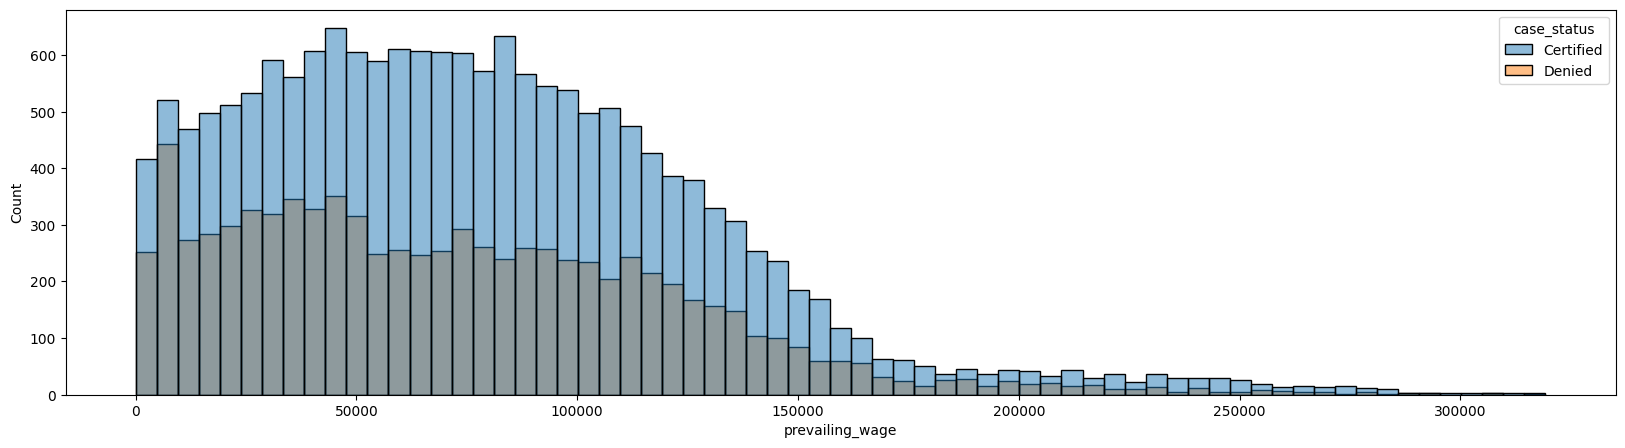

In [130]:
# Relation between prevailing_wage & case_status

plt.figure(figsize = (20, 5))
sns.histplot(data, x = "prevailing_wage", hue = "case_status");

* Observation: We have sa few outliners over here also, nearby ~14500 USD, on the other side of nearby ~250000 || although we won't be handling that we are using Deecision Tree, which can handled using normalization
* mostly the certified status id more than denied status across plot. but point to be noted
* *  When coming to lower wages, we have more number of Denied case staus when compared with Certified one.
* * also, this dosen't goes for wages more that 50000 USD, here its completely opposite, we have more number of CERTIFIED case.

case_status    Certified  Denied    All
continent                              
All                17001    8446  25447
Asia               11001    5839  16840
North America       2037    1250   3287
Europe              2953     774   3727
South America        492     359    851
Africa               396     154    550
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


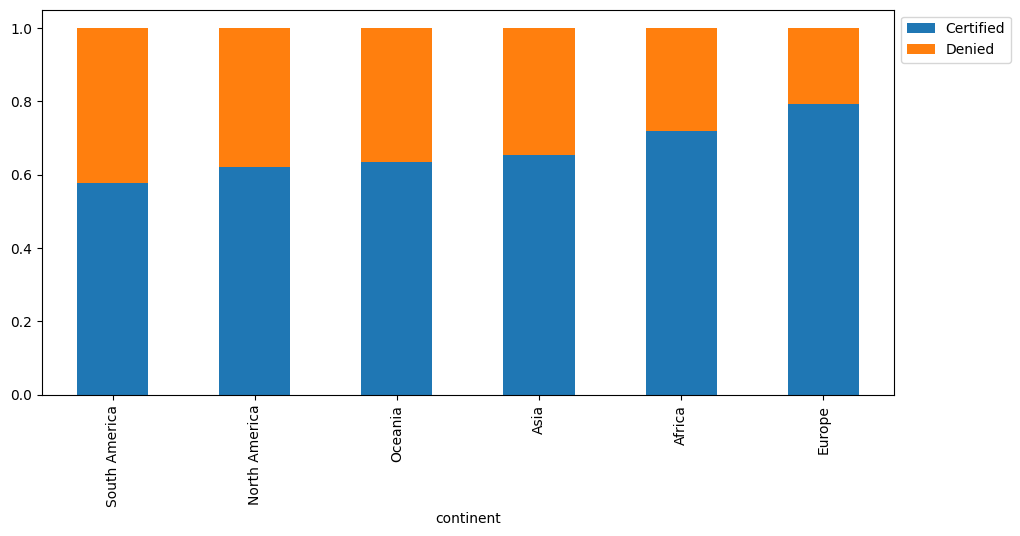

In [131]:
# relation between continent & case status

stacked_barplot(data, "continent", "case_status")

no relation between case_status & continent. No variation seen amoung continents

case_status            Certified  Denied    All
education_of_employee                          
All                        17001    8446  25447
Bachelor's                  6362    3858  10220
High School                 1164    2252   3416
Master's                    7565    2057   9622
Doctorate                   1910     279   2189
------------------------------------------------------------------------------------------------------------------------


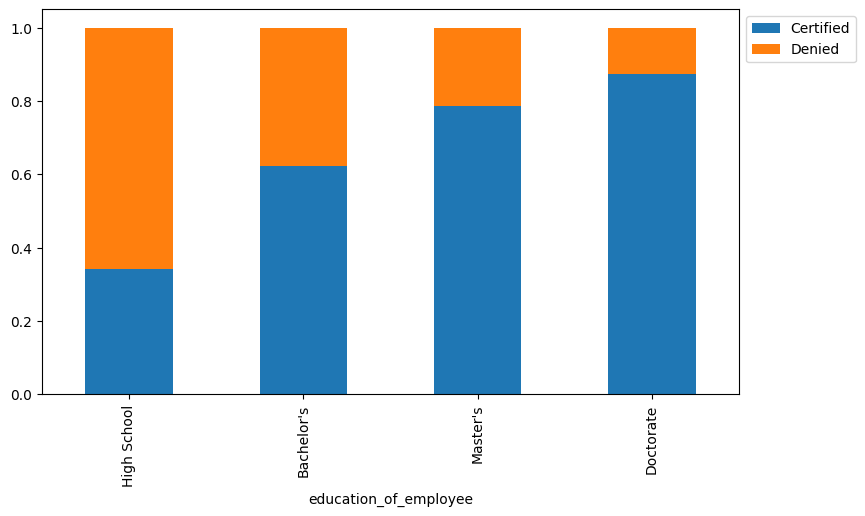

In [132]:
# relation between education & case_status

stacked_barplot(data, "education_of_employee", "case_status")

If talked about Denied status, employee having education High School > Bachelor > Master > Doctorate is denied.

case_status         Certified  Denied    All
has_job_experience                          
All                     17001    8446  25447
N                        5986    4675  10661
Y                       11015    3771  14786
------------------------------------------------------------------------------------------------------------------------


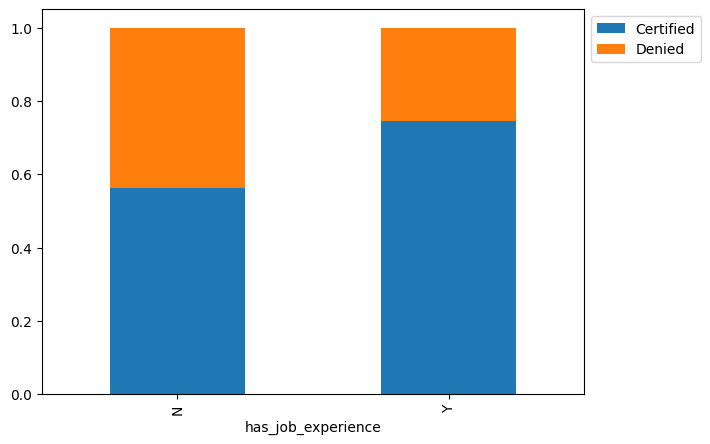

In [133]:
# relation between job experience & CASE STATUS

stacked_barplot(data, "has_job_experience", "case_status")

Obviosely as expected, the Certified status is more for one having job experience

case_status            Certified  Denied    All
requires_job_training                          
All                        17001    8446  25447
N                          15000    7498  22498
Y                           2001     948   2949
------------------------------------------------------------------------------------------------------------------------


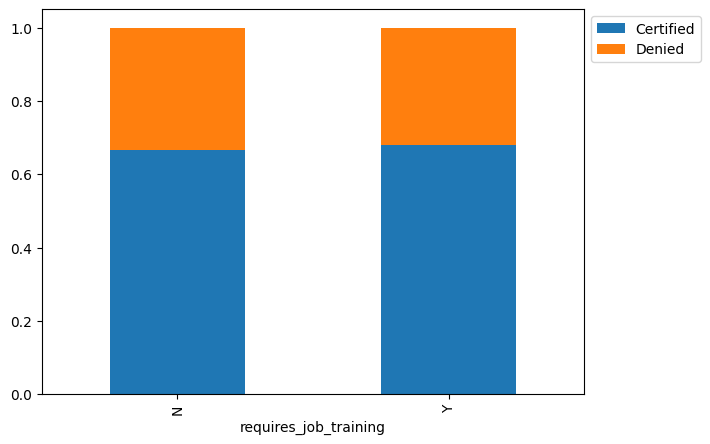

In [134]:
# relation between require job trainign & visa status

stacked_barplot(data, "requires_job_training", "case_status")

No impact of job training requirement on case status

case_status           Certified  Denied    All
region_of_employment                          
All                       17001    8446  25447
Northeast                  4524    2665   7189
West                       4097    2481   6578
South                      4908    2098   7006
Midwest                    3246    1053   4299
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


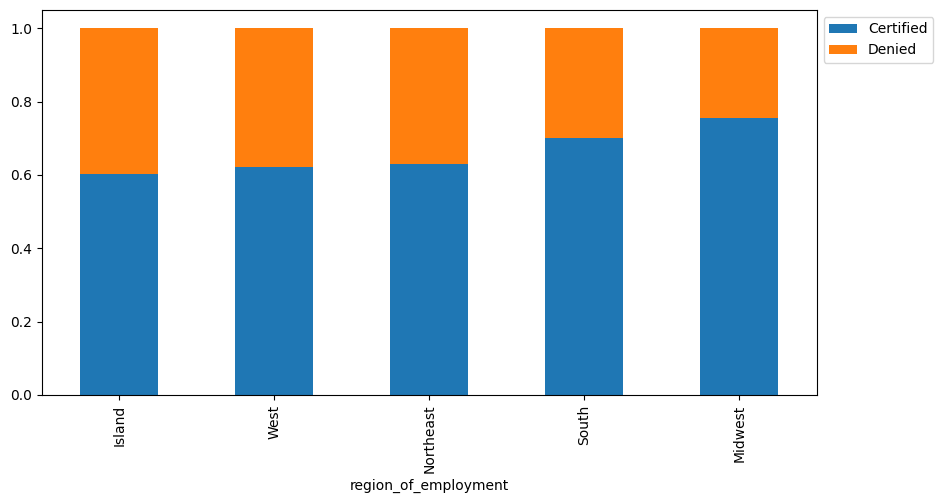

In [135]:
# relation between region of employement & visa status

stacked_barplot(data, "region_of_employment", "case_status")

Case status is maximised in eregion of employement Midwest -> South -> Northeast -> West -> Island

case_status         Certified  Denied    All
full_time_position                          
All                     17001    8446  25447
Y                       15146    7595  22741
N                        1855     851   2706
------------------------------------------------------------------------------------------------------------------------


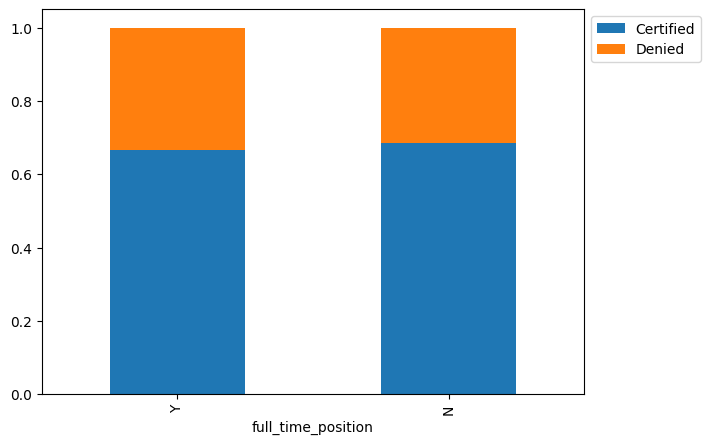

In [136]:
# relation between full time oposition & visa status

stacked_barplot(data, "full_time_position", "case_status")

almost same, no impact of full time oposition on visa status

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [137]:
data.shape

(25447, 11)

Data shape changeds from (25480, 12) to (25447, 11)

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25447 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25447 non-null  category
 1   education_of_employee  25447 non-null  category
 2   has_job_experience     25447 non-null  category
 3   requires_job_training  25447 non-null  category
 4   no_of_employees        25447 non-null  category
 5   yr_of_estab            25447 non-null  category
 6   region_of_employment   25447 non-null  category
 7   prevailing_wage        25447 non-null  float64 
 8   unit_of_wage           25447 non-null  category
 9   full_time_position     25447 non-null  category
 10  case_status            25447 non-null  category
dtypes: category(10), float64(1)
memory usage: 647.6 KB


* Two of the feature are highly skewed, no_of_employees is skewed right & yr_of_estab is skewed left

* majority of applicants have education High School > Bachelor > Master > Doctorate.

* Case status is maximised in region of employement Midwest -> South -> Northeast -> West -> Island

* Majority of employee do not require the employee to receive any additional job training. This attribute was not found to have an impact on the case statuses

* mostly we have full time job opportunity also, it don't affect the case status

# DATA splitting


In [139]:
data["case_status"] = data["case_status"].apply(lambda x: 0 if x == "Denied" else 1)

In [140]:
# seperating data

X = data.drop("case_status", axis = 1)
y = data["case_status"]

In [141]:
X = pd.get_dummies(X, drop_first=True)

In [142]:
#splitting data in to trai test in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

In [143]:
X_train.shape, X_test.shape

((17812, 20), (7635, 20))



    We have 17,812 and 7,635 rows in the train and test datasets



In [144]:
y.value_counts(1)

1    0.668094
0    0.331906
Name: case_status, dtype: float64

In [145]:
y_train.value_counts(1)

1    0.668089
0    0.331911
Name: case_status, dtype: float64

In [146]:
y_test.value_counts(1)

1    0.668107
0    0.331893
Name: case_status, dtype: float64

stratify has maintained distribution of classes when splitting data set (used to keep the same proportions as the initial dataset.)

In [147]:
# now lets write a function to calculate performance

def model_performance_classification_sklearn(model, feature, target):
  pred = model.predict(feature)
  acc = accuracy_score(target, pred)
  recall = recall_score(target, pred)
  precision = precision_score(target, pred)
  f1 = f1_score(target, pred)

  df_pref = pd.DataFrame(
    {
      "Accuracy": acc,
      "Recall": recall,
      "Precision": precision,
      "F1": f1
    },
    index=[0]
  )

  return df_pref


In [148]:
# Function to make confusion matrix

def confusion_matrix_sklearn(model, feature, target):
  y_pred = model.predict(feature)
  cm =confusion_matrix(target, y_pred)
  labels = np.asarray(
      [
          ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
          for item in cm.flatten()
      ]
  ).reshape(2,2)

  plt.figure(figsize = (6,4))
  sns.heatmap(cm, annot=labels, fmt = "")
  plt.ylabel("Actual label")
  plt.xlabel("Predicted label")


## Decision Tree - Model Building

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.663785  0.747108   0.749017  0.748062


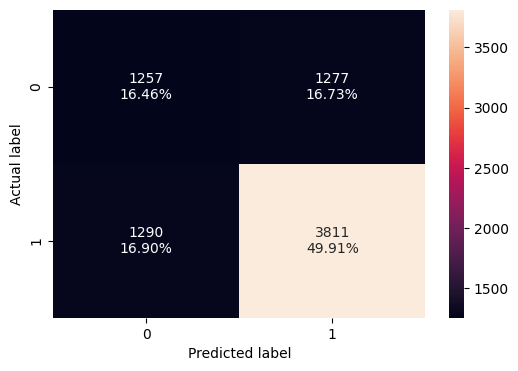

In [149]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(d_tree,X_test,y_test)

In [150]:
d_tree

DecisionTreeClassifier(random_state=1)

- Decision tree is overfitting for Training data & givinbg the accuracy of 100%, where as if we talk about testing data, model accuracy drops to 66%.
- Model performance has to improved by tuning hyperparamater

In [151]:
#Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.668,1:0.332},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30),
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.668, 1: 0.332}, max_depth=2,
                       max_leaf_nodes=2, min_impurity_decrease=0.0001,
                       random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.711599  0.932605   0.719108  0.812059
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.709103  0.929034   0.718248  0.810155


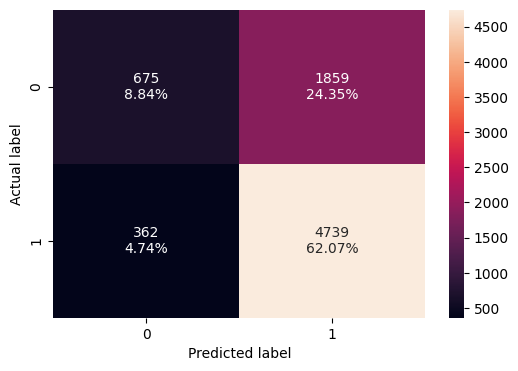

In [152]:
# lets check model performance after tuning hyperparametrs

#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

+ after tuning huperparameters, our model performance improved as now it is not in over fit stage

- also, the F! score improved & is almost same for both test & train data set

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999832  0.999916   0.999832  0.999874
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.682253  0.764556   0.760976  0.762762


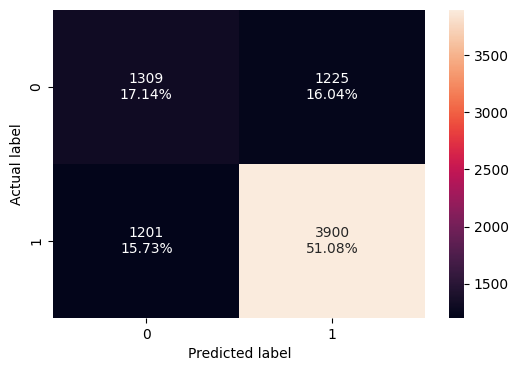

In [153]:
# lets do Random Forest Classifier

rf_estimator = RandomForestClassifier(random_state = 1)
rf_estimator.fit(X_train, y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,X_test,y_test)


as we can see, random forest is also over fitting in training data set. lets handle this by again tuning hyperparameters

In [154]:
rf_tuned = RandomForestClassifier(class_weight={0:0.668,1:0.332}, random_state = 1, oob_score=True, bootstrap=True)
parameters = {
                'max_depth': list(np.arange(10, 30, 10)) + [None],
                'max_features': ['sqrt', None],
                'min_samples_leaf': np.arange(5,15,5),
                'min_samples_split': np.arange(5, 20, 5),
                'n_estimators': np.arange(20, 120, 40)}

scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(rf_tuned, parameters, scoring = scorer, cv=3, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

rf_tuned = grid_obj.best_estimator_

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.668, 1: 0.332}, max_depth=10,
                       min_samples_leaf=5, min_samples_split=15, oob_score=True,
                       random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.740737  0.762521   0.835082  0.797154
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.719319  0.745344   0.818338  0.780137


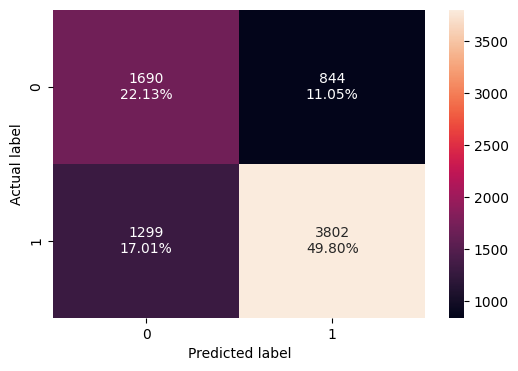

In [155]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

after tuning ther hyperparamater, the model perfoprmance improved as well as f1 score

## Bagging Model Building

Training Performance: 
    Accuracy    Recall  Precision        F1
0  0.976701  0.978067   0.986941  0.982484
Training Performance: 
    Accuracy    Recall  Precision        F1
0  0.688278  0.762203   0.769139  0.765656


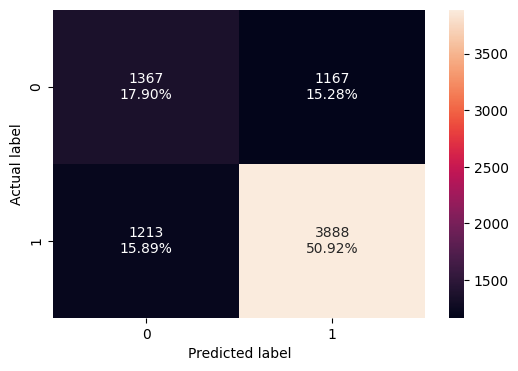

In [156]:
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)


bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier, X_train, y_train)
print("Training Performance: \n", bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier, X_test, y_test)
print("Training Performance: \n", bagging_classifier_model_test_perf)

confusion_matrix_sklearn(bagging_classifier, X_test, y_test)


Bagging model is over fitted for training dataset. Handling this by tuning hyperparameter

In [157]:
# bagging hyperparameter tuning


bagging_estimator_tuned = BaggingClassifier(random_state = 1)
parameters = {  'max_samples': [0.7, 0.8, 0.9, 1],
                'max_features': [0.7, 0.8, 0.9, 1],
                'n_estimators': [10, 20, 30, 40, 50] }

scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring = scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

bagging_estimator_tuned = grid_obj.best_estimator_

bagging_estimator_tuned.fit(X_train, y_train)


BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=50,
                  random_state=1)

Training Performance: 
    Accuracy    Recall  Precision        F1
0  0.954357  0.993277   0.941608  0.966753
Training Performance: 
    Accuracy    Recall  Precision        F1
0  0.725737  0.872574   0.755047  0.809567


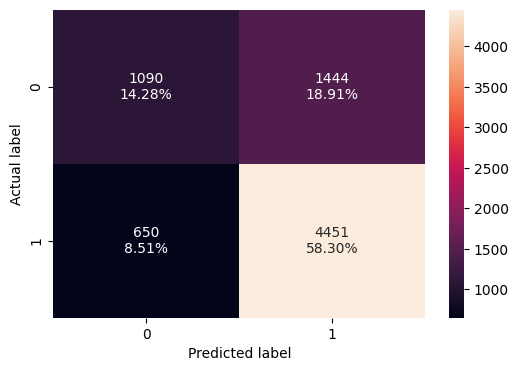

In [158]:
# tuned model performance check

bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_train, y_train)
print("Training Performance: \n", bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_test, y_test)
print("Training Performance: \n", bagging_estimator_tuned_model_test_perf)

confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

AS  we can see, still the model is in overfit zome for traing data set & NOT FOR  test data set & the reason being the size of training data saet is more than the size of test data set

## Boosting Model Building


Training Performance: 
    Accuracy    Recall  Precision        F1
0  0.738322  0.888151   0.760414  0.819334
Training Performance: 
    Accuracy    Recall  Precision        F1
0   0.73556  0.877671   0.762432  0.816003


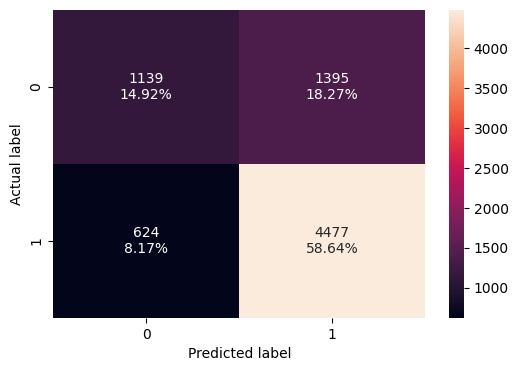

In [159]:
# ada boosting classifier

ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier, X_train, y_train)
print("Training Performance: \n", ab_classifier_model_train_perf)
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier, X_test, y_test)
print("Training Performance: \n", ab_classifier_model_test_perf)

confusion_matrix_sklearn(ab_classifier, X_test, y_test)



AdaBoosting model is giving a quite good result, also this model is mnot in over fit zore unlike others above

In [160]:
# still try to improve the model performance by tuning models hyper parameter

ab_tuned = AdaBoostClassifier(random_state=1)
parameters = {
    "base_estimator":[DecisionTreeClassifier(max_depth=1),
                      DecisionTreeClassifier(max_depth=2)],
    "n_estimators": np.arange(20,120,40),
    "learning_rate":np.arange(0.2,2,0.6)
}
scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)


ab_tuned = grid_obj.best_estimator_

ab_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.2, n_estimators=60, random_state=1)

Training Performance: 
    Accuracy    Recall  Precision        F1
0   0.74927  0.870252   0.779937  0.822623
Training Performance: 
    Accuracy    Recall  Precision       F1
0  0.745514  0.861596   0.780362  0.81897


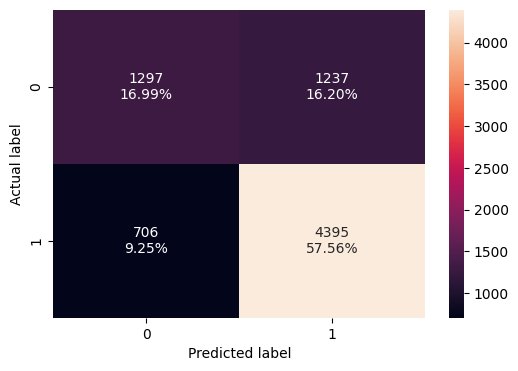

In [161]:
ab_tuned_model_train_perf = model_performance_classification_sklearn(ab_tuned, X_train, y_train)
print("Training Performance: \n", ab_tuned_model_train_perf)
ab_tuned_model_test_perf = model_performance_classification_sklearn(ab_tuned, X_test, y_test)
print("Training Performance: \n", ab_tuned_model_test_perf)

confusion_matrix_sklearn(ab_tuned, X_test, y_test)

a minute negligible improvement in F1 score of ada  boosting model after hyperparameter tuning

# Gradient Boodting classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.755726  0.875546   0.784032  0.827266
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.748265  0.865124   0.781477  0.821176


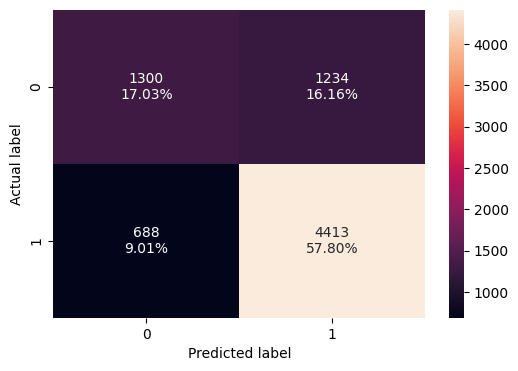

In [162]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

confusion_matrix_sklearn(gb_classifier,X_test,y_test)

model is performance great for both test & training data set, & a excellent F1 scoce. Anywayts, let's tune hyper parameter for the model & let's check if the performance improves.

**Hyperparameter tuning fro Gradient Boodting classifier**

In [163]:
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

parameters = {
    "n_estimators": [100,175,250],
    "subsample":[0.8,1],
    "max_features":[0.8,0.9,1]
}

scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

gbc_tuned = grid_obj.best_estimator_

gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, random_state=1, subsample=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.755221  0.873613   0.784485  0.826654
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.748003  0.863164   0.782199  0.82069


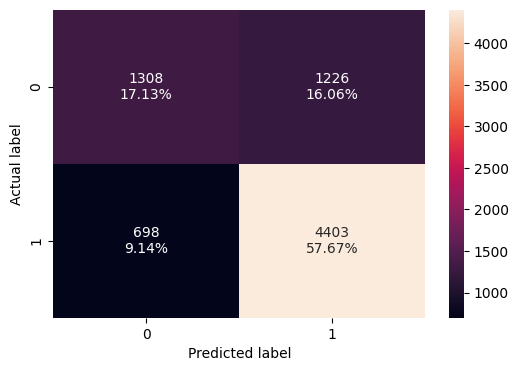

In [164]:
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

confusion_matrix_sklearn(gbc_tuned,X_test,y_test)



As the model was already giving its best, no more improvement can be seen in model after tuning

## Model Performance Comparison and Conclusions

In [165]:
# training model performance comparision

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     ab_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned"]

print("Training performance comparison:")

models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned
Accuracy,1.0,0.711599,0.999832,0.740737,0.976701,0.954357,0.738322,0.749270,0.755726,0.755221
Recall,1.0,0.932605,0.999916,0.762521,0.978067,0.993277,0.888151,0.870252,0.875546,0.873613
Precision,1.0,0.719108,0.999832,0.835082,0.986941,0.941608,0.760414,0.779937,0.784032,0.784485
F1,1.0,0.812059,0.999874,0.797154,0.982484,0.966753,0.819334,0.822623,0.827266,0.826654


In [166]:
# testing model performance comparison

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     ab_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned"]

print("Testing performance comparison:")

models_test_comp_df



Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned
Accuracy,0.663785,0.709103,0.682253,0.719319,0.688278,0.725737,0.735560,0.745514,0.748265,0.748003
Recall,0.747108,0.929034,0.764556,0.745344,0.762203,0.872574,0.877671,0.861596,0.865124,0.863164
Precision,0.749017,0.718248,0.760976,0.818338,0.769139,0.755047,0.762432,0.780362,0.781477,0.782199
F1,0.748062,0.810155,0.762762,0.780137,0.765656,0.809567,0.816003,0.818970,0.821176,0.820690


* Decision tree, Random forest, Bagging classifie are overfit for the training dataset

* For testing dataset, Decision tree tuned, Adaboost, Gradient boost are found to give good performance on the training & testing data sets.


* Amoung all the models, Gradient Boost Classifier has the highest F1 score

## Actionable Insights and Recommendations

1. After analysis, characteristics such as ``number of employees,'' ``years of establishment,'' ``previaling wage,'``whether the job is a full-time job,'' and ``whether the employee requires job training'' influence whether or not a visa is granted. **It's very surprising that it dosen't affect case status Accepted or rejected?**

2. **Education of Employee** : this is one of the major factor based on which case status matters. i.e. a worker with a doctrate degree have a quite good chance of ~85% of case to be certified & on the other hand wroker with High school level of education have a 65% of chance of case being Rejected

3. **Continent the employee**: If the employee already has work experience, the probability that the visa will be approved is more than 80% in the continent where the employee is from (e.g. Europe) (If the employee already has work experience, the visa will be approved Chance is 75% or higher, but 50% chance). B. Refusal of visa if employee has no work experience) is an important feature

4.  **Region of Employement**: Region of employemt plays a key role in case status, as per analysis, it was observed, worker from Midwest & South mhave majority Cerified case status.

4. **Wage Unit**: Its quite surprisingly that 65% of worker having hourely pay as their wage unit, ends up having Denied case_status & when compared with Weekly/Monthly/Yearly, over 72% of case have been CERTIFIED